<center><h1>Decision Trees</h1></center>

# 1. Introduction

Decision trees are a popular and powerful method used for both classification and regression tasks in machine learning. They work by splitting data into subsets based on feature values, building a tree-like model of decisions. Each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a final decision or prediction.

One of the key advantages of decision trees is their interpretability — the resulting models are easy to visualize and understand. They can capture non-linear relationships and handle both numerical and categorical data without the need for much preprocessing. However, decision trees can easily overfit if not properly controlled, which is why techniques like pruning or using ensemble methods (such as Random Forests) are often applied.


![Decision Trees](DecisionTrees.png)

# 2. How Does Decision Trees Work?

Decision trees build predictive models by learning simple decision rules inferred from data features. The goal is to create a model that predicts the target variable by asking a sequence of questions about the input features. Here's a detailed breakdown of how decision trees work:


## 2.1. Splitting the Data

The tree construction process starts at the root node. The data is split based on a feature that results in the highest information gain (for classification) or minimizes variance (for regression). Common splitting criteria include:

- **Gini Impurity** (classification)
- **Entropy / Information Gain** (classification)
- **Mean Squared Error (MSE)** (regression)

The algorithm evaluates all possible splits and chooses the one that best separates the data.


## 2.2. Recursive Partitioning

After the first split, the algorithm recursively applies the same splitting process to each subset of the data. This recursive partitioning continues until a stopping criterion is met, such as:

- All data points in a node belong to the same class.
- A maximum tree depth is reached.
- A minimum number of samples required to split a node is not met.



## 2.3. Leaf Nodes and Predictions

Once the stopping criteria are satisfied, a leaf node is created. In a classification tree, each leaf node represents a class label. In a regression tree, each leaf node contains a numeric value, typically the average of the target values in that node.


## 2.4. Advantages and Limitations

**Advantages:**
- Easy to interpret and visualize.
- Require little data preprocessing (no need for normalization or scaling).
- Can handle both numerical and categorical data.

**Limitations:**
- Prone to overfitting, especially if the tree is very deep.
- Small changes in the data can result in very different trees (high variance).
- Greedy splitting may not always lead to the globally optimal tree.

---


# 3. About the Student Performance Estimation Dataset

## 3.1 Overview


This dataset simulates student performance data for academic analysis.
It includes information on study hours, absences, school support availability, and final grades.
You can use it to predict academic success and understand how different factors contribute to student achievement.

## 3.2 Applications

You can use this dataset to:
- Predict student final grades using ML models like Decision Tree or XGBoost
- Analyze the impact of study time, attendance, and support systems
- Practice educational analytics with a synthetic dataset

## 3.3 Features Description

- `student_id`: Unique ID for each student (S0001–S1000)
- `study_hours`: Total study time per week
- `absences`: Number of absences
- `school_support`: Whether the student received school-provided academic support
- `final_grade`: Final exam score (0–100)

---

# 4. Steps to Apply Decision Trees Algorithm to Student Performance Estimation Dataset

## 4.1 Data Loading

- Import necessary libraries (e.g., pandas, numpy, matplotlib, scikit-learn).
- Load the Student Performance Estimation dataset into a DataFrame.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Student Performance Estimation dataset
data = pd.read_csv('17_student_performance_estimation.csv')

# Display the first few rows
data.head()

,student_id,study_hours,absences,school_support,final_grade
0,S0001,28.9,8,no,30
1,S0002,14.8,10,yes,100
2,S0003,10.5,7,yes,87
3,S0004,18.4,7,yes,47
4,S0005,15.3,1,no,82


## 4.2 Exploratory Data Analysis (EDA)

- Check for missing values.
- Summarize basic statistics (mean, median, etc.).
- Visualize feature distributions (e.g., histograms, boxplots).
- Explore relationships between features (e.g., scatter plots, correlation heatmap).

Missing values in each column:
student_id        0
study_hours       0
absences          0
school_support    0
final_grade       0
dtype: int64

Basic statistics of the dataset:
       study_hours     absences  final_grade
count  1000.000000  1000.000000  1000.000000
mean     14.787500    10.007000    48.382000
std       8.652485     6.048432    29.119169
min       0.100000     0.000000     0.000000
25%       7.475000     5.000000    23.000000
50%      14.600000    10.000000    47.000000
75%      22.200000    15.000000    72.250000
max      29.900000    20.000000   100.000000


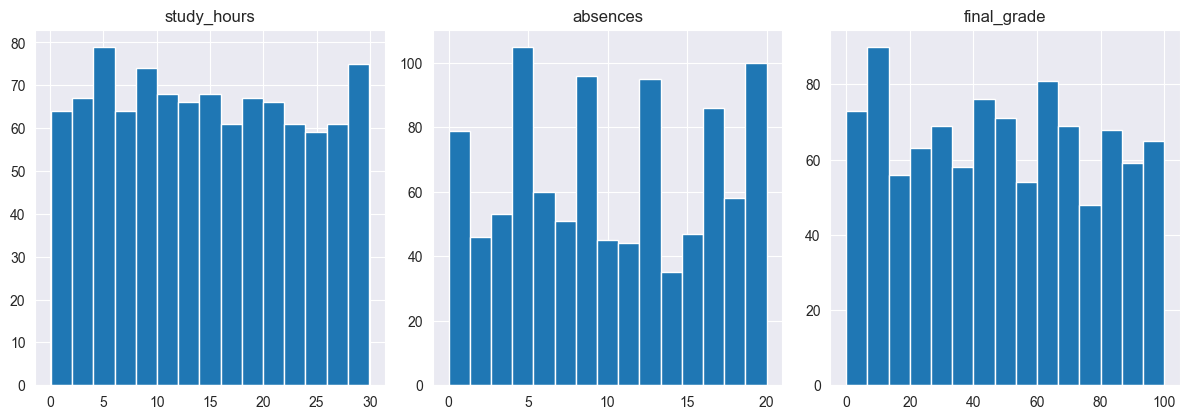

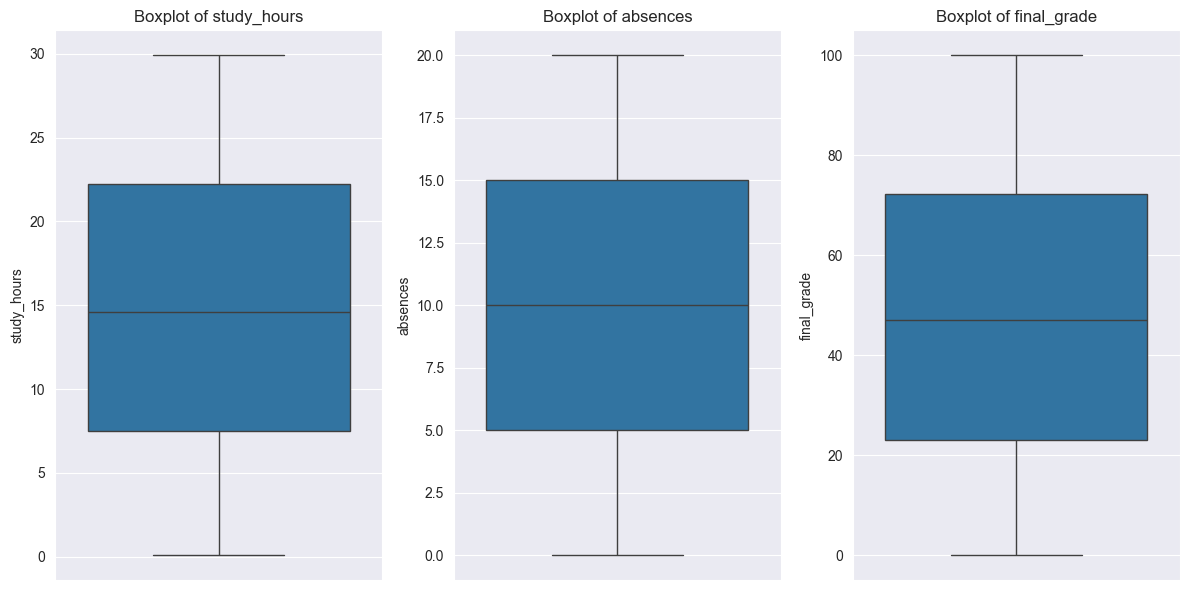

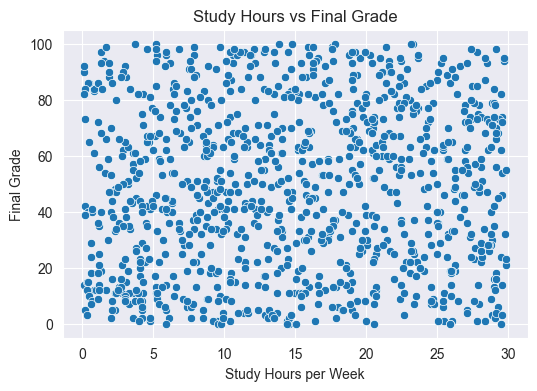

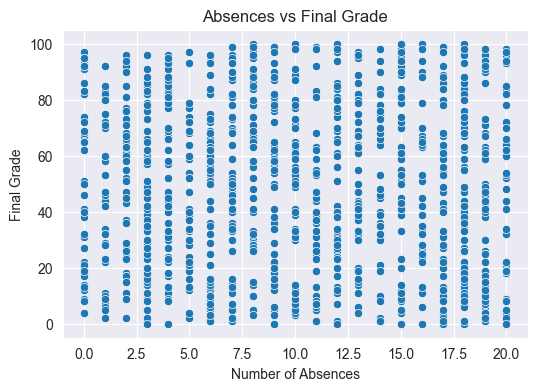

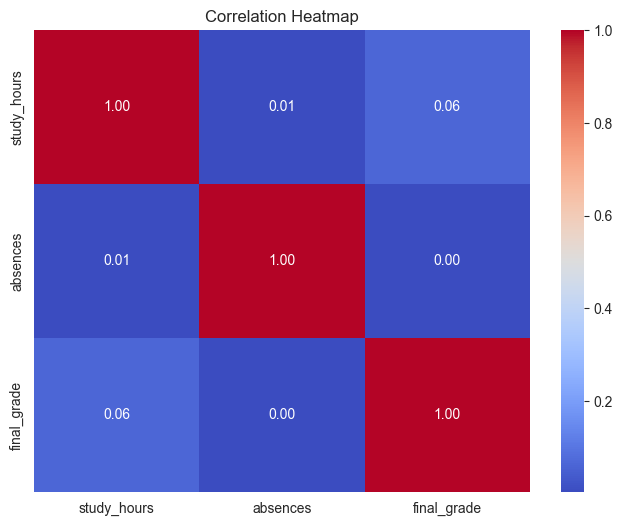

In [6]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Summarize basic statistics
print("\nBasic statistics of the dataset:")
print(data.describe())

# Visualize feature distributions - Histograms
data.hist(bins=15, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

# Boxplots for numerical features
numerical_features = ['study_hours', 'absences', 'final_grade']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Explore relationships - Scatter plots
# Study hours vs Final grade
plt.figure(figsize=(6, 4))
sns.scatterplot(x='study_hours', y='final_grade', data=data)
plt.title('Study Hours vs Final Grade')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Grade')
plt.show()

# Absences vs Final grade
plt.figure(figsize=(6, 4))
sns.scatterplot(x='absences', y='final_grade', data=data)
plt.title('Absences vs Final Grade')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 4.3 Data Preprocessing

- Encode categorical variables (e.g., `school_support`).
- Normalize or standardize features if necessary.
- Split the dataset into training and testing sets.

In [7]:
# Encode categorical variables
# 'school_support' is a Yes/No variable, we can encode it as 1/0
data['school_support'] = data['school_support'].map({'yes': 1, 'no': 0})

# (Optional) Drop 'student_id' since it's just an identifier and not useful for prediction
data = data.drop('student_id', axis=1)

# Features and target variable
X = data.drop('final_grade', axis=1)
y = data['final_grade']

# Optional: If you want to treat it as classification,
# you can turn final_grade into categories (e.g., Pass/Fail or Grades A/B/C etc.)
# For now, let's assume we are doing a regression to predict exact grades.

# Normalize features if necessary (for Decision Trees not strictly required, but good practice sometimes)
# Here we skip normalization because Decision Trees are not sensitive to feature scales

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (800, 3)
Shape of testing set: (200, 3)


## 4.4 Model Building

- Initialize a Decision Tree Classifier.
- Train the model on the training data.

In [8]:
# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Print the model's training accuracy
train_accuracy = dt_classifier.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 97.12%


## 4.5 Model Evaluation

- Predict on the testing set.
- Evaluate performance using metrics such as:
  - Accuracy
  - Precision, Recall, F1-Score
  - Confusion Matrix

Accuracy: 1.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.33      0.25      0.29         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       1.00      0.00      0.

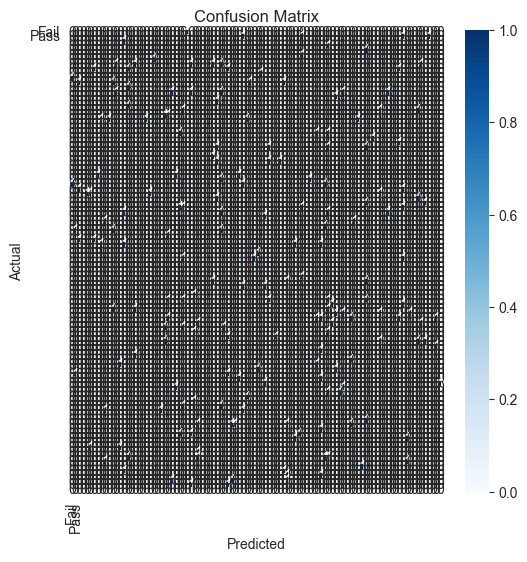

In [10]:
# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
plt.figure(figsize=(6, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4.6 Hyperparameter Tuning

- Optimize parameters such as:
  - `max_depth`
  - `min_samples_split`
  - `criterion` (e.g., "gini" vs "entropy")
- Use Grid Search or Random Search to find the best model.

In [22]:
from sklearn.model_selection import GridSearchCV
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')


# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with cross-validation (5-fold)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_dt_classifier = grid_search.best_estimator_

# Evaluate the best model
best_train_accuracy = best_dt_classifier.score(X_train, y_train)
best_test_accuracy = best_dt_classifier.score(X_test, y_test)

print(f"Best Training Accuracy: {best_train_accuracy * 100:.2f}%")
print(f"Best Testing Accuracy: {best_test_accuracy * 100:.2f}%")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Training Accuracy: 76.38%
Best Testing Accuracy: 1.50%


## 4.7 Model Interpretation

- Visualize the Decision Tree.
- Analyze feature importance to understand which factors most influence final grades.

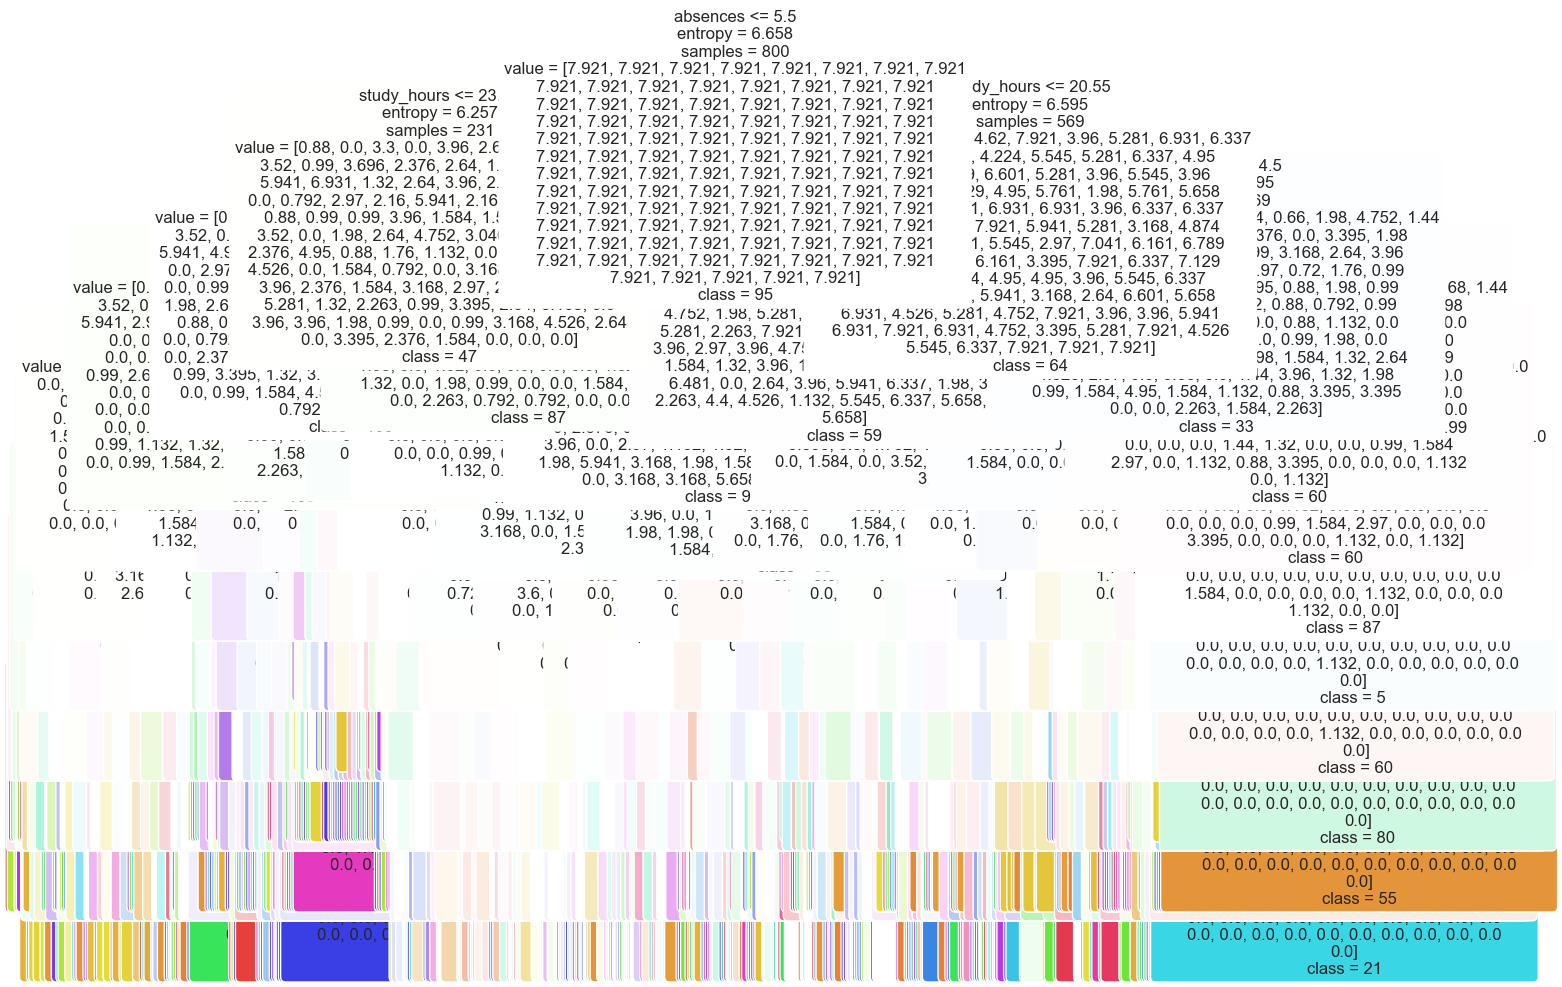

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Dynamically set the class names from the target variable
class_names = list(y_train.unique())

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in class_names], rounded=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()